<div style="font-weight: bold;font-size:50px">Introduction</div>

><div style="background-color : ffffe0;">
><ul style="font-size:15px;">
><b>Problem Statement</b>
>
>Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
>
>Understand who your customers are and what they need so that you can modify your product promotion campaigns to suit your customer segments.
>
><b>Target</b>
>Create clustering to group customer segments.
>
    
<div style="font-weight: bold; font-size:25px">Dataset Columns</div>

><div style="background-color: ffffe0;">
><ul style="font-size:15px;">
>    
><br><b>People</b>
><br>- ID               :  Customer's unique identifier
><br>- Year_Birth       :  Customer's birth year
><br>- Education        :  Customer's education level
><br>- Marital_Status   :  Customer's marital status
><br>- Income           :  Customer's yearly household income
><br>- Kidhome, Teenhome:  Number of children\teenagers in customer's household
><br>- Dt_Customer      :  Date of customer's enrollment with the company
><br>- Recency          :  Number of days since customer's last purchase
><br>- Complain         :  1 if customer complained in the last 2 years, 0 otherwise
><br><b>Products</b>
><br>- MntWines, MntFruits              :  Amount spent on wine\fruits in last 2 years
><br>- MntMeatProducts, MntFishProducts :  Amount spent on meat\fish in last 2 years
><br>- MntSweetProducts, MntGoldProds   :  Amount spent on sweets\gold in last 2 years
><br><b>Promotion</b>
><br>- NumDealsPurchases :  Number of purchases made with a discount
><br>- AcceptedCmp1-5    :  1 if customer accepted the offer in the 1st-5th campaign, 0 otherwise
><br>- Response          :  1 if customer accepted the offer in the last campaign, 0 otherwise
><br><b>Place</b>
><br>- NumWebPurchases    :  Number of purchases made through the company’s web site
><br>- NumCatalogPurchase :  Number of purchases made using a catalogue
><br>- NumStorePurchases  :  Number of purchases made directly in stores
><br>- NumWebVisitsMonth  :  Number of visits to company’s web site in the last month
</ul>
</div>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import warnings

from scipy.stats import randint
from scipy import stats

from pandas.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering #kernel
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler # mean0 std1
from sklearn.preprocessing import MinMaxScaler # range(0, 1)
from sklearn.preprocessing import MaxAbsScaler # max(1)
from sklearn.preprocessing import RobustScaler # range(Quantile(1, 3) == 1)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.exceptions import ConvergenceWarning
import sklearn.exceptions


from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

sns.set()
#from  warnings import simplefilter
#simplefilter("ignore", category=ConvergenceWarning)

<br><div style="font-weight: bold; font-size: 50px">Contents</div>

>[1 : Data analysis and validation](#section_1)
>    - [1.1 Basic data information and initial structuring](#sub_11)
>    - [1.2 Data Pre-proccessing](#sub_12)
>    - [1.3 Correlation and outliers](#sub_13)
>    - [1.4 Feature engineering and Preprocessing the second set of data](#sub_14)
>    - [1.5 Gaining insights from hierarchical data](#sub_15)
>
>[2 : PCA and Clustering](#section_2)
>    - [2.1 Exploration of Kernel hyperparameters by grid search](#sub_21)
>    
>[3 : Clustering-Kmean](#section_3)  
>    - [3.1 Optimal number of clusters](#sub_31)
>    - [3.2 Visualizing Clusters](#sub_32)
>
>[4 : Cluster Analysis](#section_4)
>    - [4.1 Gain insights from clustered data](#sub_41)

<a id="section_1"></a>
<div style="font-weight: bold; font-size: 40px">1 : Data analysis and validation</div>


<a id="sub_11"></a>
><div style="font-weight: bold; font-size: 20px">1.1 Basic data information and initial structuring</div>
>Perform structuring when importing libraries and loading data.
>
>Hierarchize indexes to make it easier to visualize the distribution of data.

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t', index_col=['Marital_Status', 'Education'])

In [3]:
data_rep = data.rename(index={'2n Cycle': 'PhD', 'Master': 'PhD', 'YOLO': 'Married',
                           'Together': 'Married', 'Divorced': 'Single', 'Widow': 'Single',
                             'Alone': 'Single'}) # 'Absurd': 'Single' 'YOLO': 'Single' 'Basic': 'Graduation'

In [4]:
data_rep.sort_index(inplace=True)
data_rep.head(1) # Visualize with any number you want.

ID  Year_Birth   Income  Kidhome  Teenhome  \
Marital_Status Education                                                  
Absurd         Graduation  7734        1993  79244.0        0         0   

                          Dt_Customer  Recency  MntWines  MntFruits  \
Marital_Status Education                                              
Absurd         Graduation  19-12-2012       58       471        102   

                           MntMeatProducts  ...  NumWebVisitsMonth  \
Marital_Status Education                    ...                      
Absurd         Graduation              125  ...                  1   

                           AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Marital_Status Education                                              
Absurd         Graduation             0             0             1   

                           AcceptedCmp1  AcceptedCmp2  Complain  \
Marital_Status Education                                          
Absurd         Graduation             1             0         0   

                           Z_CostContact  Z_Revenue  Response  
Marital_Status Education                                       
Absurd         Graduation              3         11         1  

[1 rows x 27 columns]

>Check the basic information of the data.

In [5]:
data_rep.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2240 entries, ('Absurd', 'Graduation') to ('Single', 'PhD')
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  Nu

In [6]:
data_rep.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [7]:
data_rep.isnull().sum()

ID                      0
Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<a id="sub_12"></a>
><div style="font-weight: bold; font-size: 20px">1.2 Data Pre-proccessing</div>
>As a first pre-processing step, we will correct only the missing data that will affect the data analysis itself.

In [8]:
data_rep['Income'].fillna(data_rep['Income'].mean(), inplace=True)
data_rep.isnull().sum()

ID                     0
Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<a id="sub_13"></a>
><div style="font-weight: bold; font-size: 20px">1.3 Correlation and outliers</div>
>Find correlations, visualize the presence of outliers with scatter plots, and think about how to deal with them.
>
>Instead of examining all the correlations, we visualize only those with a large std width obtained from the initial structural analysis.

In [9]:
index_corr = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
              'Teenhome', 'Kidhome', 'NumWebPurchases', 'NumCatalogPurchases',
              'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Response']

data_rep[index_corr].corr()

Income  MntWines  MntFruits  MntMeatProducts  \
Income               1.000000  0.576789   0.428747         0.577802   
MntWines             0.576789  1.000000   0.389637         0.562667   
MntFruits            0.428747  0.389637   1.000000         0.543105   
MntMeatProducts      0.577802  0.562667   0.543105         1.000000   
MntFishProducts      0.437497  0.399753   0.594804         0.568402   
MntSweetProducts     0.436162  0.386581   0.567164         0.523846   
MntGoldProds         0.321978  0.387516   0.392995         0.350609   
Teenhome             0.019018  0.004846  -0.176764        -0.261160   
Kidhome             -0.425176 -0.496297  -0.372581        -0.437129   
NumWebPurchases      0.380550  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.586725  0.635226   0.487917         0.723827   
NumStorePurchases    0.526489  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.549824 -0.320653  -0.418383        -0.539470   
NumDealsPurchases   -0.082290  0.010940  -0.132114        -0.122415   
Response             0.132756  0.247254   0.125289         0.236335   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
Income                      0.437497          0.436162      0.321978   
MntWines                    0.399753          0.386581      0.387516   
MntFruits                   0.594804          0.567164      0.392995   
MntMeatProducts             0.568402          0.523846      0.350609   
MntFishProducts             1.000000          0.579870      0.422875   
MntSweetProducts            0.579870          1.000000      0.369724   
MntGoldProds                0.422875          0.369724      1.000000   
Teenhome                   -0.204187         -0.162475     -0.021725   
Kidhome                    -0.387644         -0.370673     -0.349595   
NumWebPurchases             0.293681          0.348544      0.421836   
NumCatalogPurchases         0.534478          0.490924      0.437697   
NumStorePurchases           0.459855          0.448756      0.381678   
NumWebVisitsMonth          -0.446003         -0.423294     -0.250719   
NumDealsPurchases          -0.139361         -0.120100      0.049085   
Response                    0.111331          0.117372      0.139850   

                     Teenhome   Kidhome  NumWebPurchases  NumCatalogPurchases  \
Income               0.019018 -0.425176         0.380550             0.586725   
MntWines             0.004846 -0.496297         0.542265             0.635226   
MntFruits           -0.176764 -0.372581         0.296735             0.487917   
MntMeatProducts     -0.261160 -0.437129         0.293761             0.723827   
MntFishProducts     -0.204187 -0.387644         0.293681             0.534478   
MntSweetProducts    -0.162475 -0.370673         0.348544             0.490924   
MntGoldProds        -0.021725 -0.349595         0.421836             0.437697   
Teenhome             1.000000 -0.036133         0.155500            -0.110769   
Kidhome             -0.036133  1.000000        -0.361647            -0.502237   
NumWebPurchases      0.155500 -0.361647         1.000000             0.378376   
NumCatalogPurchases -0.110769 -0.502237         0.378376             1.000000   
NumStorePurchases    0.050695 -0.499683         0.502713             0.518738   
NumWebVisitsMonth    0.134884  0.447846        -0.055846            -0.520364   
NumDealsPurchases    0.387741  0.221798         0.234185            -0.008617   
Response            -0.154446 -0.080008         0.148730             0.220810   

                     NumStorePurchases  NumWebVisitsMonth  NumDealsPurchases  \
Income                        0.526489          -0.549824          -0.082290   
MntWines                      0.642100          -0.320653           0.010940   
MntFruits                     0.461758          -0.418383          -0.132114   
MntMeatProducts               0.479659          -0.539470          -0.122415   
MntFishProducts               0.4598

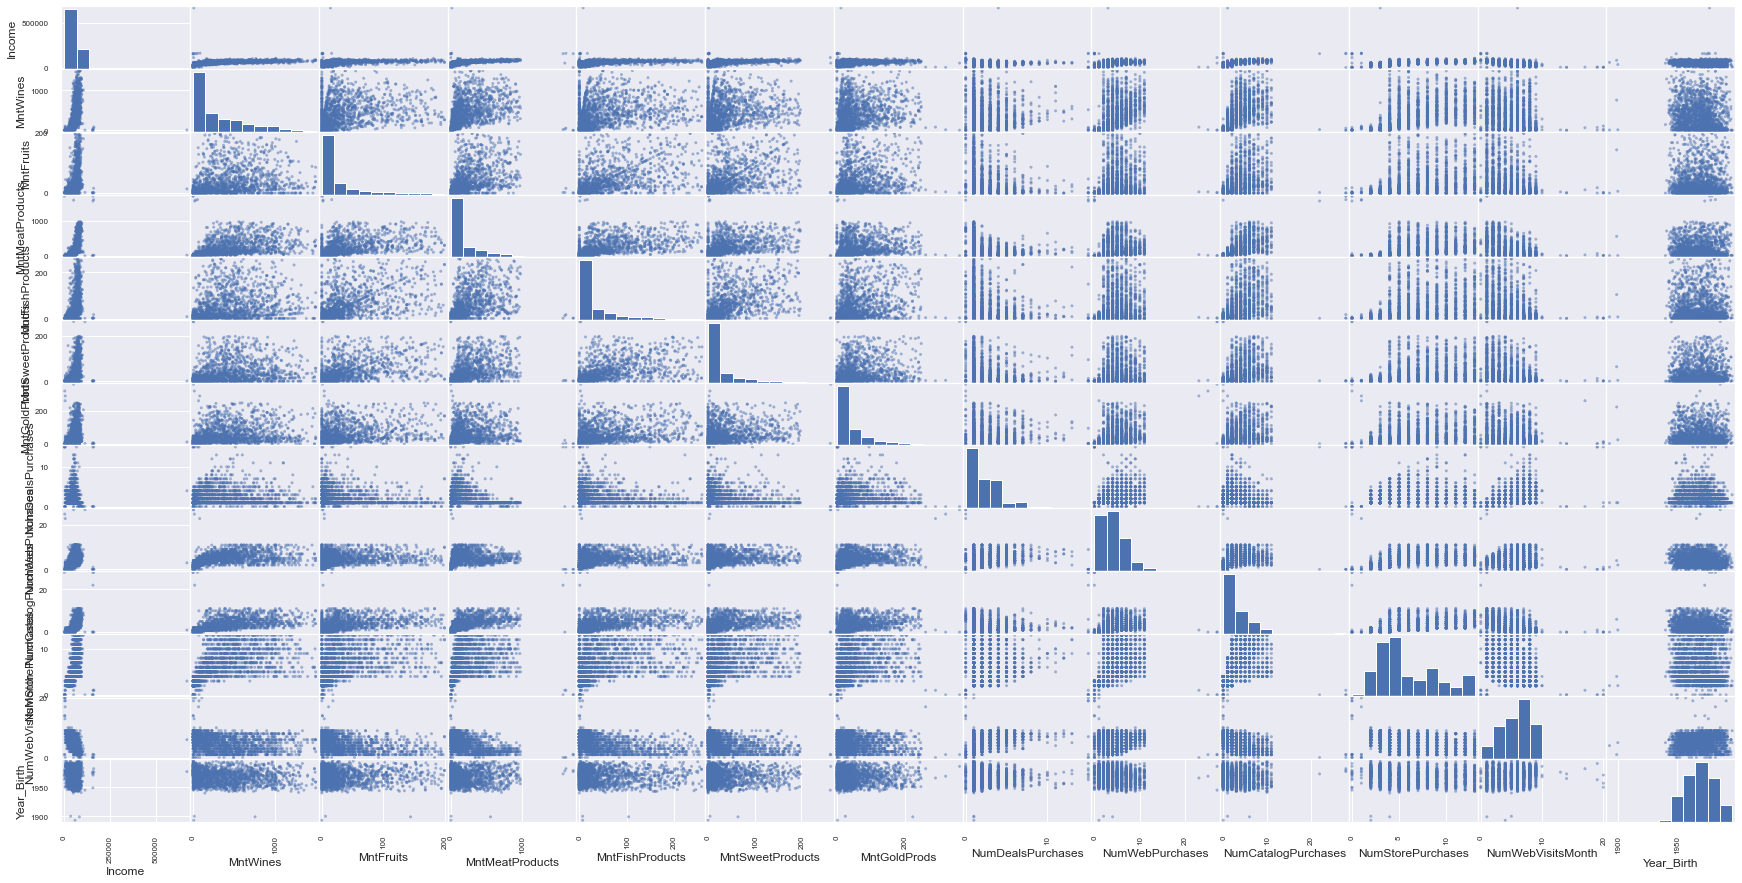

In [10]:
index_corr = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
              'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
              'NumWebVisitsMonth', 'Year_Birth']
scatter_matrix(data_rep[index_corr], figsize=(30, 15), alpha=0.5);

<a id="sub_14"></a>
><div style="font-weight: bold; font-size: 20px">1.4 Feature engineering and Preprocessing the second set of Datasets</div>
>Remove any outliers from the data and check the correlation again.
>
>If there is a number that is obviously wrong, guess that it is an outlier and remove it.

In [11]:
data_rep[index_corr].describe()

Income     MntWines    MntFruits  MntMeatProducts  \
count    2240.000000  2240.000000  2240.000000      2240.000000   
mean    52247.251354   303.935714    26.302232       166.950000   
std     25037.797168   336.597393    39.773434       225.715373   
min      1730.000000     0.000000     0.000000         0.000000   
25%     35538.750000    23.750000     1.000000        16.000000   
50%     51741.500000   173.500000     8.000000        67.000000   
75%     68289.750000   504.250000    33.000000       232.000000   
max    666666.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth   Year_Birth  
count        2240.000000  2240.000000  
mean            5.316518  1968.805804  
std             2.426645    11.984069  
min             0.000000  1893.000000  
25%             3.000000  1959.000000  
50%             6.000000  1970.000000  
75%             7.000000  1977.000000  
max            20.000000  1996.000000

In [12]:
new_data = data_rep.copy()
new_data.drop("Dt_Customer", axis=1, inplace=True)
new_data

ID  Year_Birth   Income  Kidhome  Teenhome  \
Marital_Status Education                                                  
Absurd         Graduation  7734        1993  79244.0        0         0   
               PhD         4369        1957  65487.0        0         0   
Married        Basic        387        1976   7500.0        0         0   
               Basic       8373        1979  24594.0        1         0   
               Basic       2563        1961  28249.0        0         0   
...                         ...         ...      ...      ...       ...   
Single         PhD         3661        1995  80617.0        0         0   
               PhD         9589        1948  82032.0        0         0   
               PhD         7366        1982  75777.0        0         0   
               PhD         4286        1970  57642.0        0         1   
               PhD         9817        1970  44802.0        0         0   

                           Recency  MntWines  MntFruits  MntMeatProducts  \
Marital_Status Education                                                   
Absurd         Graduation       58       471        102              125   
               PhD              48       240         67              500   
Married        Basic            59         6         16               11   
               Basic            94         1          3                6   
               Basic            80         1          9                7   
...                            ...       ...        ...              ...   
Single         PhD              42       594         51              631   
               PhD              54       332        194              377   
               PhD              12       712         26              538   
               PhD              24       580          6               58   
               PhD              71       853         10              143   

                           MntFishProducts  ...  NumWebVisitsMonth  \
Marital_Status Education                    ...                      
Absurd         Graduation              212  ...                  1   
               PhD                     199  ...                  2   
Married        Basic                    11  ...                  8   
               Basic                    10  ...                  5   
               Basic                     2  ...                  6   
...                                    ...  ...                ...   
Single         PhD                      72  ...                  2   
               PhD                     149  ...                  1   
               PhD                      69  ...                  1   
               PhD                       8  ...                  4   
               PhD                      13  ...                  8   

                           AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Marital_Status Education                                              
Absurd         Graduation             0             0             1   
               PhD                    0             0             0   
Married        Basic                  0             0             0   
               Basic                  0             0             0   
               Basic                  0             0             0   
...                                 ...           ...           ...   
Single         PhD                    0             0             0   
               PhD                    0             0             0   
               PhD                    0             1             1   
               PhD                    1             0             0   
               PhD                    0             0             0   

                           AcceptedCmp1  AcceptedCmp2  Complain  \
Marital_Status Education                                          
Absurd         Graduation             1             0         0   
               PhD          

> Feature engineering 
> Consider and add different types of Feature

In [13]:
# Add Age
a = datetime.datetime.now() 
new_data['Age'] = a.year - new_data['Year_Birth']

In [14]:
# Wine and Meat Pair
new_data['WineMeat'] = new_data['MntWines'] + new_data['MntMeatProducts']
new_data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25037.797168     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count      2240.000000  ...   2240.000000   2240.000000   2240.000000   
mean         37.525446  ...      0.074554      0.072768      0.064286   
std          54.628979  ...      0.262728      0.259813      0.245316   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           3.000000  ...      0.000000      0.000000      0.000000   
50%          12.000000  ...      0.000000      0.000000      0.000000   
75%          50.000000  ...      0.000000      0.000000      0.000000   
max         259.000000  ...      1.000000      1.000000      1.000000   

       AcceptedCmp2     Complain  Z_CostContact  Z_Revenue     Response  \
count   2240.000000  2240.000000         2240.0     2240.0  2240.000000   
mean       0.013393     0.009375            3.0       11.0     0.149107   
std        0.114976     0.096391            0.0        0.0     0.356274   
min        0.000000     0.000000            3.0       11.0     0.000000   
25%        0.000000     0.000000            3.0       11.0     0.000000   
50%        0.000000     0.000000            3.0       11.0     0.000000   
75%        0.000000     0.000000            3.0       11.0     0.000000   
max        1.000000     1.000000            3.0       11.0     1.000000   

               Age     WineMeat  
count  2240.000000  2240.000000  
mean     52.194196   470.885714  
std      11.984069   499.742576  
min      25.000000     0.000000  
25%      44.000000    39.000000  
50%      51.000000   276.000000  
75%      62.000000   796.250000  
max     128.000000  2102.000000  

[8 rows x 28 columns]

>The max66666 for income is obviously wrong.
>Just excluding outliers will change the size of the data, so replace them with the median.

In [15]:
data_income = data['Income'] 
data[np.abs(data_income) > 200000]

ID  Year_Birth    Income  Kidhome  Teenhome  \
Marital_Status Education                                                   
Together       Graduation  9432        1977  666666.0        1         0   

                          Dt_Customer  Recency  MntWines  MntFruits  \
Marital_Status Education                                              
Together       Graduation  02-06-2013       23         9         14   

                           MntMeatProducts  ...  NumWebVisitsMonth  \
Marital_Status Education                    ...                      
Together       Graduation               18  ...                  6   

                           AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Marital_Status Education                                              
Together       Graduation             0             0             0   

                           AcceptedCmp1  AcceptedCmp2  Complain  \
Marital_Status Education                                          
Together       Graduation             0             0         0   

                           Z_CostContact  Z_Revenue  Response  
Marital_Status Education                                       
Together       Graduation              3         11         0  

[1 rows x 27 columns]

>The data is not normally distributed, but we can apply the theory of normal distribution to exclude it.
>Confirm that the distribution of the data is not normal.

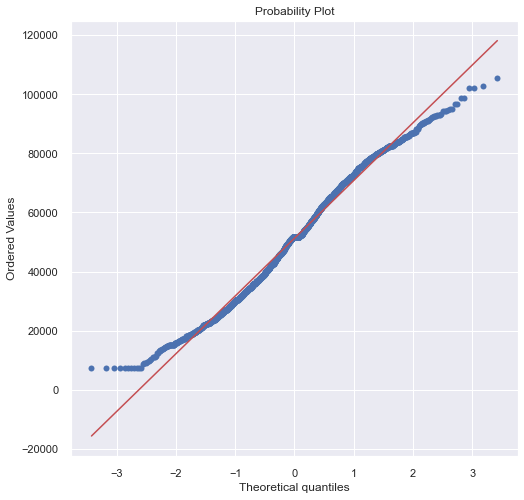

In [59]:
fig = plt.subplots(figsize=(8,8))
stats.probplot(new_data['Income'], dist="norm", plot=plt);

In [60]:
# Shapiro-Wilk test
stats.shapiro(new_data['Income']) # p_value α=0.05

ShapiroResult(statistic=0.9873243570327759, pvalue=3.3413790939858246e-13)

In [61]:
stats.kstest(new_data['WineMeat'], "norm")

KstestResult(statistic=0.9968643876826556, pvalue=0.0)

>Quantile 99.7%. Anything above this is excluded as an outlier.
>
>The reason we use 99.6% below is that 99.7% still contains outliers.
>
>(In some cases, you may want to include this value.)
>
>Replace the outliers with the mean so that the size remains the same.

In [16]:
new_data.quantile(0.996)

ID                      11133.660
Year_Birth               1994.000
Income                 105834.572
Kidhome                     2.000
Teenhome                    2.000
Recency                    99.000
MntWines                 1398.332
MntFruits                 189.044
MntMeatProducts           961.308
MntFishProducts           247.132
MntSweetProducts          192.088
MntGoldProds              242.132
NumDealsPurchases          13.000
NumWebPurchases            11.000
NumCatalogPurchases        11.000
NumStorePurchases          13.000
NumWebVisitsMonth          10.132
AcceptedCmp3                1.000
AcceptedCmp4                1.000
AcceptedCmp5                1.000
AcceptedCmp1                1.000
AcceptedCmp2                1.000
Complain                    1.000
Z_CostContact               3.000
Z_Revenue                  11.000
Response                    1.000
Age                        78.000
WineMeat                 1947.484
Name: 0.996, dtype: float64

In [17]:
new_data[(np.abs(new_data) > new_data.quantile(0.996, )).any(1)] = new_data.median()
new_data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5567.611161  1968.870089   51269.040862     0.435714     0.492857   
std     3159.377857    11.319692   19625.917142     0.536619     0.542061   
min        1.000000  1943.000000    7500.000000     0.000000     0.000000   
25%     2924.500000  1960.000000   35888.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8233.250000  1977.000000   66476.000000     1.000000     1.000000   
max    11133.000000  1994.000000  105471.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.163839   291.625000    24.423661       153.661161   
std      28.355594   319.708618    37.284470       203.526254   
min       0.000000     0.000000     0.000000         0.000000   
25%      25.000000    25.000000     2.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      73.000000   480.500000    29.000000       211.250000   
max      99.000000  1396.000000   189.000000       961.000000   

       MntFishProducts  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count      2240.000000  ...   2240.000000   2240.000000   2240.000000   
mean         34.993304  ...      0.069643      0.062500      0.058929   
std          51.329179  ...      0.254601      0.242116      0.235544   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           3.000000  ...      0.000000      0.000000      0.000000   
50%          12.000000  ...      0.000000      0.000000      0.000000   
75%          43.000000  ...      0.000000      0.000000      0.000000   
max         247.000000  ...      1.000000      1.000000      1.000000   

       AcceptedCmp2     Complain  Z_CostContact  Z_Revenue     Response  \
count   2240.000000  2240.000000         2240.0     2240.0  2240.000000   
mean       0.011607     0.008482            3.0       11.0     0.138839   
std        0.107133     0.091728            0.0        0.0     0.345856   
min        0.000000     0.000000            3.0       11.0     0.000000   
25%        0.000000     0.000000            3.0       11.0     0.000000   
50%        0.000000     0.000000            3.0       11.0     0.000000   
75%        0.000000     0.000000            3.0       11.0     0.000000   
max        1.000000     1.000000            3.0       11.0     1.000000   

               Age     WineMeat  
count  2240.000000  2240.000000  
mean     52.129911   446.775893  
std      11.319692   470.979378  
min      27.000000     0.000000  
25%      44.000000    40.000000  
50%      51.000000   276.000000  
75%      61.000000   748.000000  
max      78.000000  1938.000000  

[8 rows x 28 columns]

>Check the scatter plot to see if the outliers have been removed.
>
>We can see that the outliers have been removed. And we can now recognize the shape of the correlation.

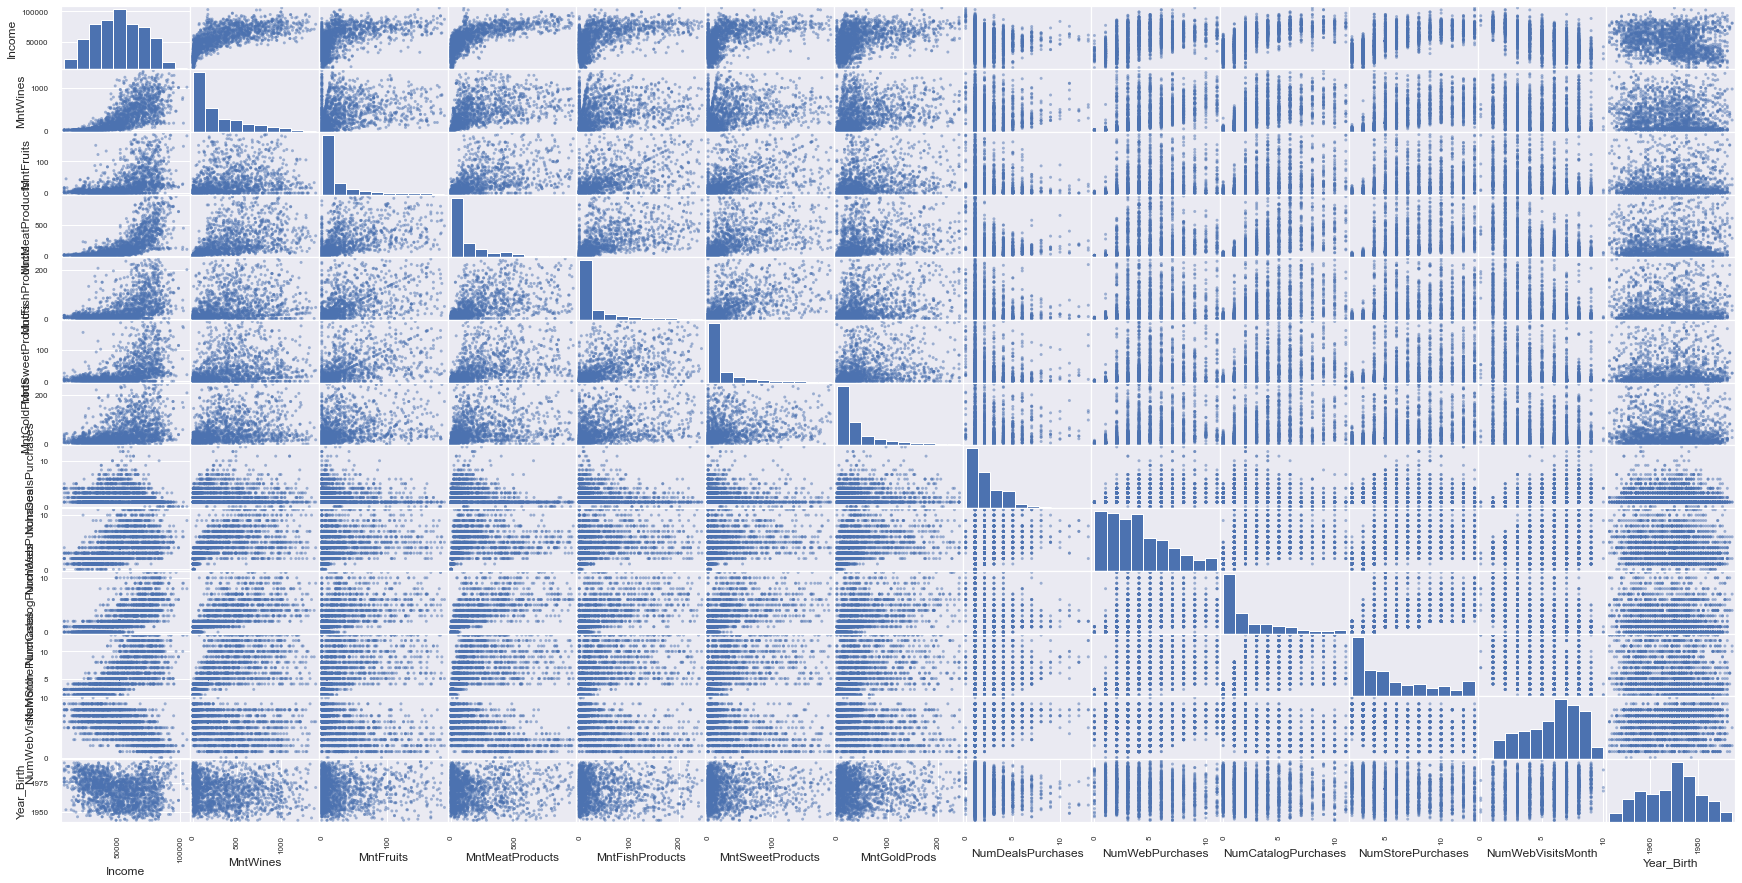

In [18]:
scatter_matrix(new_data[index_corr], figsize=(30, 15), alpha=0.5);
# sns.pairplot(new_data.reset_index(), diag_kind='kde', plot_kws={'alpha':0.2})

><div style="font-weight: bold; font-size: 20px">Results found so far</div>
>
>When it comes to purchases, the correlation with "income" is very strong.
>
>It is only natural that the more income you have, the more you spend on luxury goods.

<a id="sub_15"></a>
><div style="font-weight: bold; font-size: 20px">1.5 Gaining insights from hierarchical data</div>
>
>Consider what insights can be gleaned from the stratified data.

In [19]:
kwargs = dict(histtype='stepfilled', edgecolor='none', bins=50, alpha=0.3)

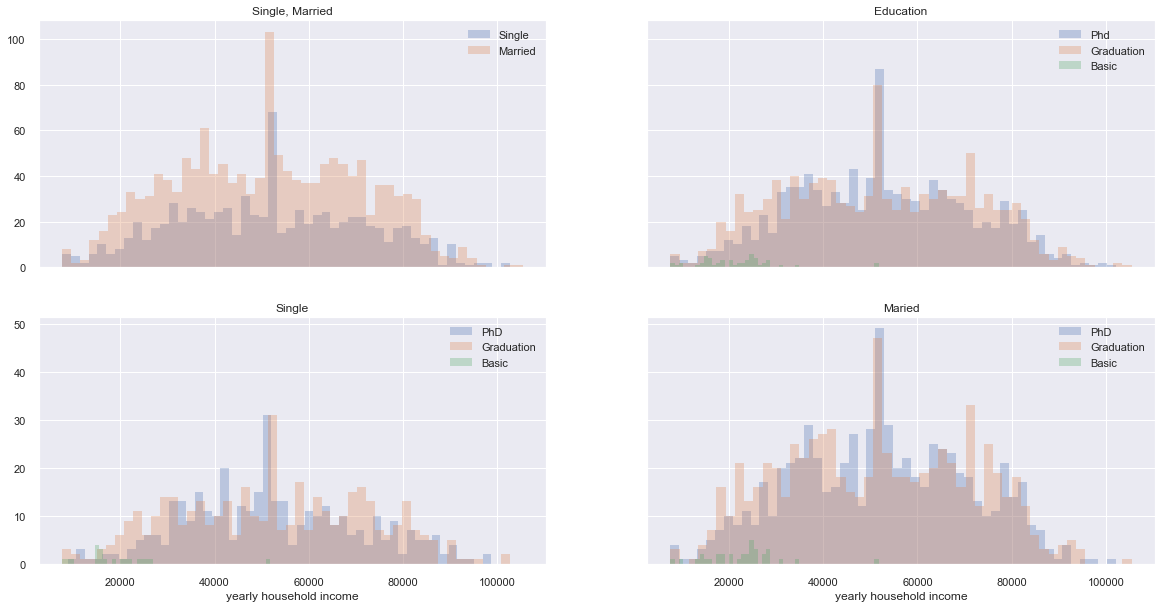

In [20]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 10))
# not for
ax[0, 0].hist(new_data.loc['Single']['Income'], label='Single',  **kwargs)
ax[0, 0].hist(new_data.loc['Married']['Income'],label='Married',  **kwargs)
ax[0, 0].set_title('Single, Married')
ax[0, 0].legend()

ax[0, 1].hist(new_data.loc[(slice(None),'PhD'), :]['Income'], label='Phd',  **kwargs)
ax[0, 1].hist(new_data.loc[pd.IndexSlice[:, 'Graduation'], :]['Income'],label='Graduation',  **kwargs)
ax[0, 1].hist(new_data.loc[pd.IndexSlice[:, 'Basic'], :]['Income'],label='Basic',  **kwargs)
ax[0, 1].set_title('Education')
ax[0, 1].legend()

ax[1, 0].hist(new_data.loc[('Single', 'PhD')]['Income'], label='PhD',  **kwargs)
ax[1, 0].hist(new_data.loc[('Single', 'Graduation')]['Income'], label='Graduation',  **kwargs)
ax[1, 0].hist(new_data.loc[('Single', 'Basic')]['Income'],label='Basic',  **kwargs)
ax[1, 0].set_title('Single')
ax[1, 0].set_xlabel('yearly household income')
ax[1, 0].legend()

ax[1, 1].hist(new_data.loc[('Married', 'PhD')]['Income'], label='PhD',  **kwargs)
ax[1, 1].hist(new_data.loc[('Married', 'Graduation')]['Income'],label='Graduation',  **kwargs)
ax[1, 1].hist(new_data.loc[('Married', 'Basic')]['Income'],label='Basic',  **kwargs)
ax[1, 1].set_title('Maried')
ax[1, 1].set_xlabel('yearly household income')
ax[1, 1].legend();

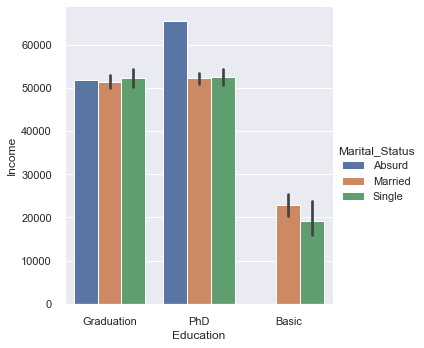

In [21]:
sns.catplot(x='Education', y='Income', hue='Marital_Status', kind='bar', col=None, data=new_data.reset_index());

>Taken together with the data above, it is clear that the user base of this company tends to be people who are married and have families.
>
>What about the age range?

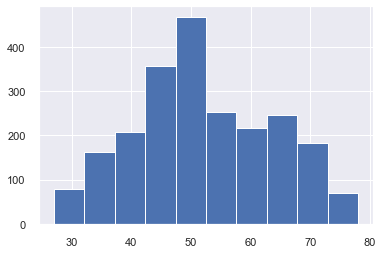

In [22]:
plt.hist(new_data['Age']);

In [23]:
def cat_plots(data, x, columns, title, figsize=(30, 20)):
    row = 3
    col = len(columns) // row
    # not sharex sharey
    fig, ax = plt.subplots(row, col, figsize=figsize)
    fig.suptitle(title, size=25)
    ax = ax.flatten()
    for i, column in enumerate(columns):
        if i % col == 0:
            ax[i].set_ylabel(column)
        sns.boxplot(x=(x), y=(column), hue=('Marital_Status'), data=(data.reset_index()), ax=ax[i], linewidth=2.5, )
        #sns.swarmplot(x=x, y=column, data=data.reset_index(), color=".25", size=0.2)
        ax[i].set_title('{} & {}'.format(x, column))

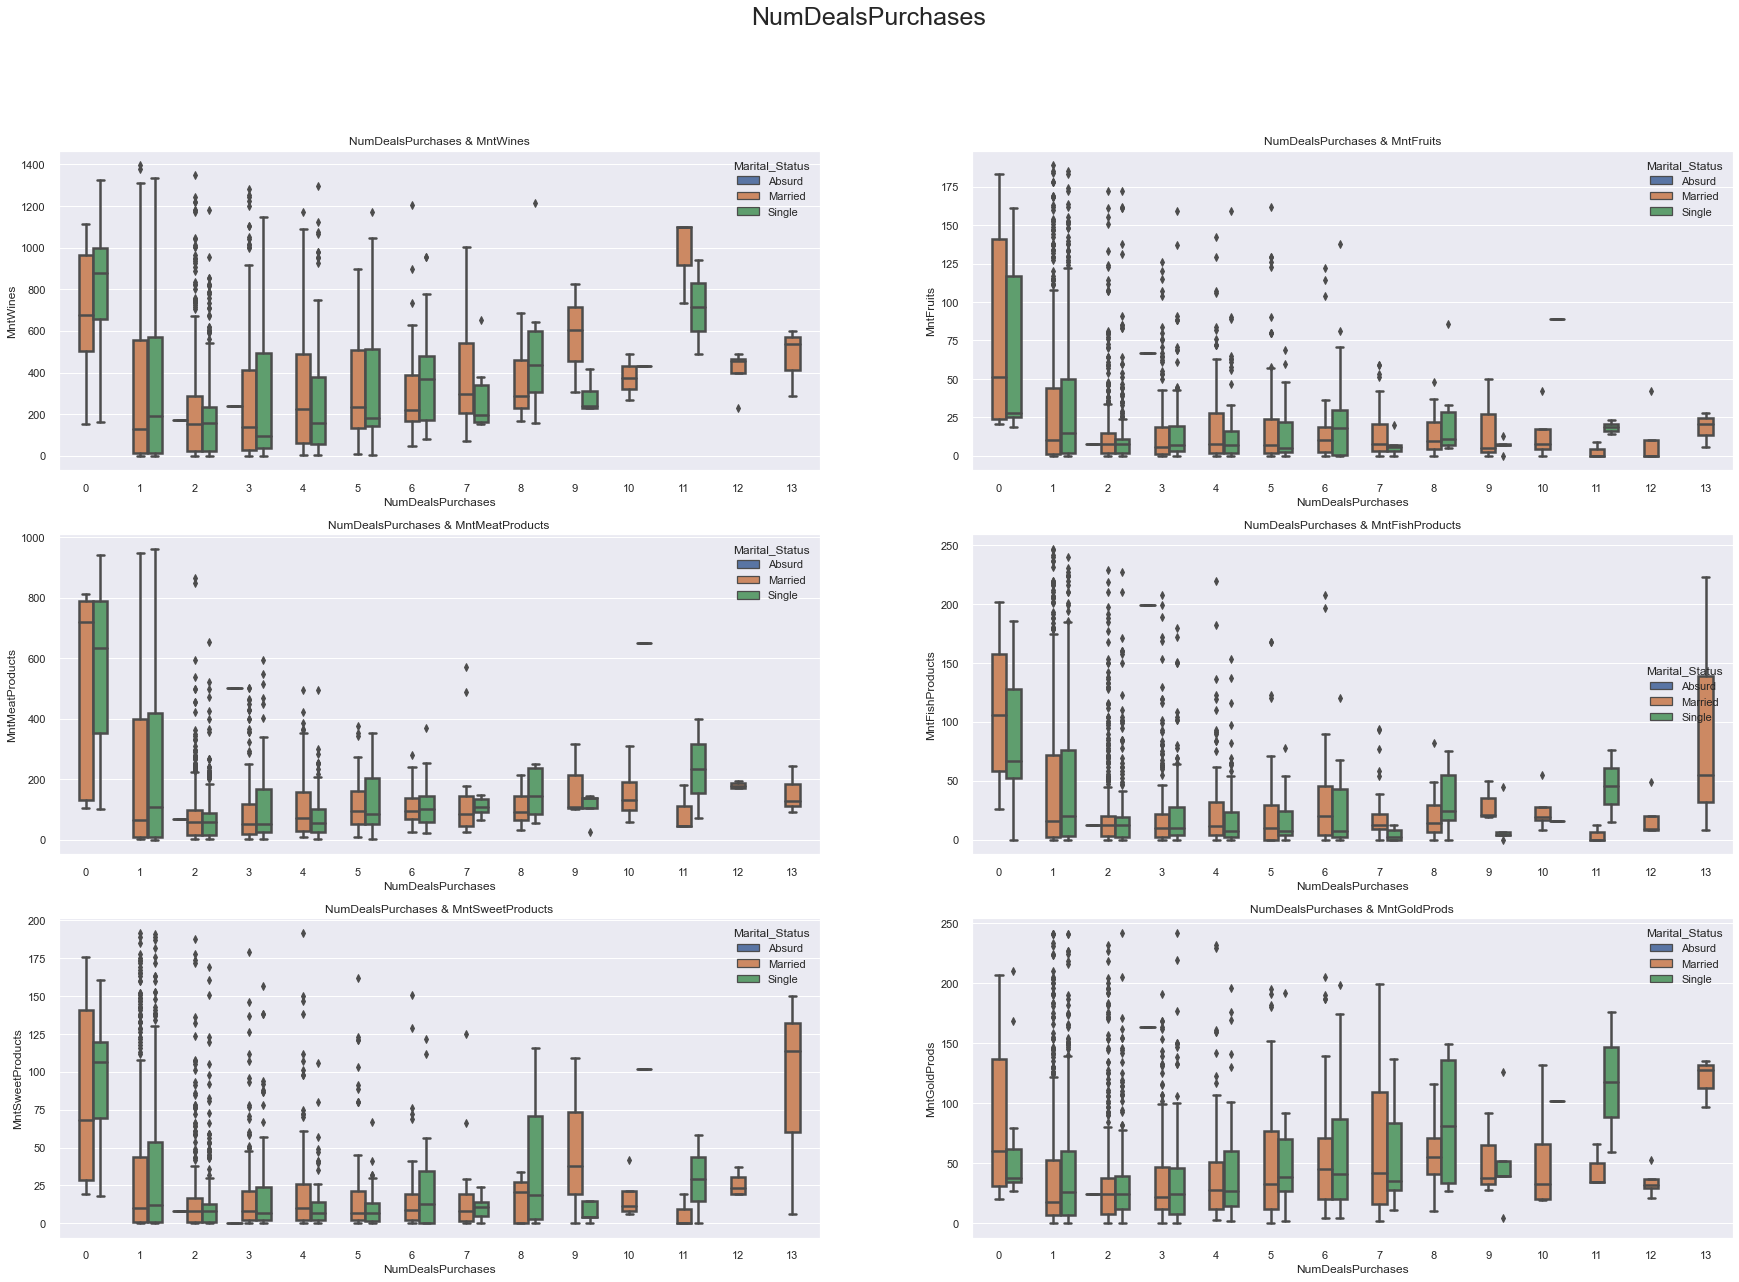

In [24]:
columns_L = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cat_plots(new_data, 'NumDealsPurchases', columns_L, 'NumDealsPurchases')
#　sns.catplot(x='NumDealsPurchases', y='MntGoldProds', hue='Marital_Status', kind='bar', col=None, data=new_data.reset_index())

<a id="section_2"></a>
<div style="font-weight: bold; font-size: 40px">2 : Mixing KernelPCA and LLE</div>


<a id="sub_21"></a>
><div style="font-weight: bold; font-size: 20px">2.1 Exploration of Kernel hyperparameters by grid search</div>
>
>Perform dimensionality reduction.
>
>Use a mixture of KernelPCA and LLE.
>
>Use grid search to find the best parameters.
>
>Since the purpose of this project is clustering, we will use absolute value scaling.

In [25]:
def my_score(estimator, X, y=None):
    X_red = estimator.transform(X)
    X_pre = estimator.inverse_transform(X_red)
    return -1 * mean_squared_error(X, X_pre)

In [26]:
abs_scaler = MaxAbsScaler()
abs_scaler.fit(new_data)
sc_abs_data = abs_scaler.transform(new_data)
sc_df_abs = pd.DataFrame(sc_abs_data, columns=new_data.columns)

param_grid = [{
    "gamma": [0.01, 0.1, 1, 10, 100],
    "kernel": ['linear' , 'rbf', 'sigmoid', 'cosine',]
}]

kpca = KernelPCA(n_components=3, fit_inverse_transform=True)

grid_search = GridSearchCV(kpca, param_grid, cv=3, scoring=my_score)

grid_search.fit(sc_abs_data)

GridSearchCV(cv=3,
             estimator=KernelPCA(fit_inverse_transform=True, n_components=3),
             param_grid=[{'gamma': [0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear', 'rbf', 'sigmoid', 'cosine']}],
             scoring=<function my_score at 0x000001F17AFA1160>)

In [27]:
grid_search.best_params_, grid_search.best_score_, grid_search.best_estimator_

({'gamma': 100, 'kernel': 'linear'},
 -0.04755286678042182,
 KernelPCA(fit_inverse_transform=True, gamma=100, n_components=3))

>Run PCA

In [28]:
kpca = grid_search.best_estimator_
kpca.fit(sc_abs_data)
new_pca_data = kpca.transform(sc_abs_data) 

lle = LocallyLinearEmbedding(n_components=3, n_neighbors=100)
new_pca_data = lle.fit_transform(new_pca_data)

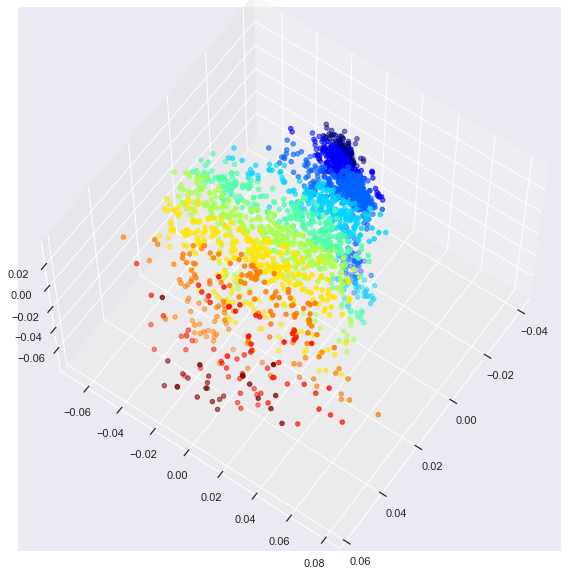

In [29]:
new_pca_data_1 = pd.DataFrame(new_pca_data, columns=["T1", "T2", "T3"])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(new_pca_data_1['T1'], new_pca_data_1['T2'], new_pca_data_1['T3'], 
             c=new_pca_data_1['T1'], cmap=plt.cm.get_cmap('jet', 10))
ax.view_init(60, 35)

<a id="section_3"></a>
<div style="font-weight: bold; font-size: 40px">3 : Clustering-Kmean</div>


<a id="sub_31"></a>
><div style="font-weight: bold; font-size: 20px">3.1 Optimal number of clusters</div>
>
>Use KElbow to automate the process of finding the optimal K-value.
>
>It can also be validated using silhouette score and inertia.
>
>The optimal cluster using silhouette score and inertia is K=4, but we want to find more subdivided clusters, so we specify 4 to 12.

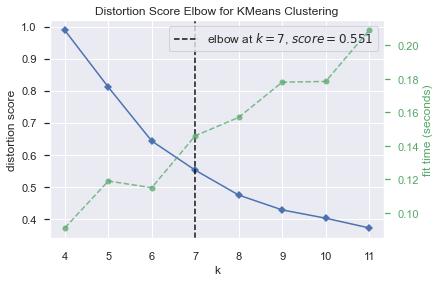

In [30]:
model = KMeans(init="k-means++", n_init=10)
visualizer = KElbowVisualizer(model, k=(4, 12))
visualizer.fit(new_pca_data) 
visualizer.show();

In [31]:
visualizer.elbow_value_

7

In [32]:
cluster = KMeans(n_clusters=visualizer.elbow_value_).fit_predict(new_pca_data)

> Append the clustering data to the original data.

In [33]:
# {Plot_Data}
pca_km_data = pd.DataFrame(new_pca_data, columns=['T1', 'T2', 'T3'])
pca_km_data['Cluster'] = cluster

In [34]:
#　{Main_Data}
new_data['Cluster'] = cluster

<a id="sub_32"></a>
><div style="font-weight: bold; font-size: 20px">3.2 Visualizing Clusters</div>
>
>Since %matplotlib notebook does not work in Jupyter lab, the visualization is done from different angles to make it easier to check even if cluster animation is disabled.
>

In [35]:
def three_plots(data, title, figsize=(20, 10)):
    fig = plt.figure(figsize=figsize)
    plt.suptitle(title, size=30, x=0.5, y=0.78)
    for i in range(1, 4):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        ax.scatter(data["T1"], data["T2"], data["T3"], c=data['Cluster'], cmap=plt.cm.get_cmap('jet', 10))
        ax.view_init(15*i+15, 25*i+15)

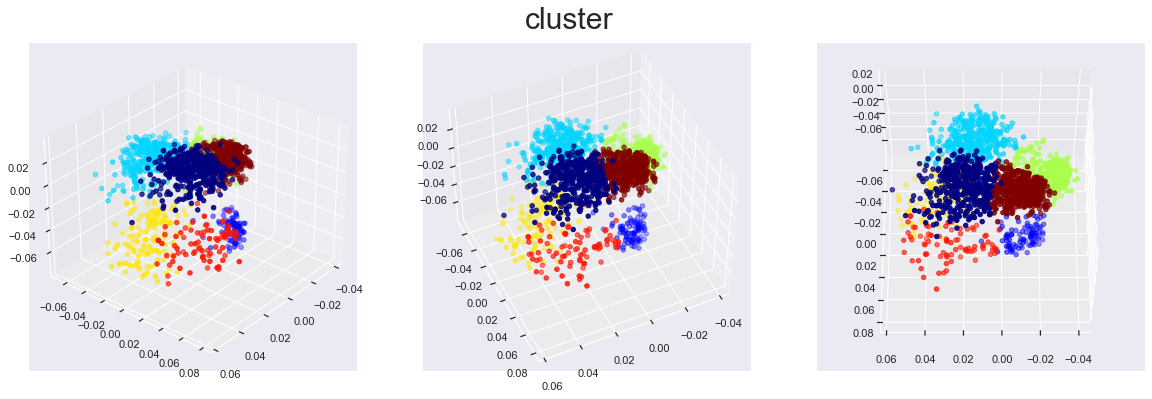

In [36]:
three_plots(pca_km_data, 'cluster') # Jupyter Lab Not %matplotlib notebook

<a id="section_4"></a>
<div style="font-weight: bold; font-size: 40px">4 : Cluster Analysis</div>

<a id="sub_41"></a>
><div style="font-weight: bold; font-size: 20px">4.1 Gain insights from clustered data.</div>
>
>Displays a variety of data based on the clusters you have created.

--------
>Number of clusters in each

<AxesSubplot:xlabel='Cluster', ylabel='count'>

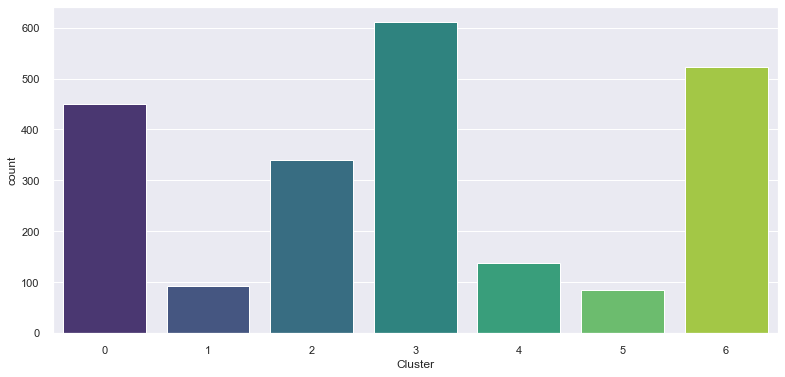

In [47]:
plt.figure(figsize=(13, 6))
sns.countplot(x="Cluster", data=pca_km_data, palette='viridis')

---------
>Income distribution

<AxesSubplot:xlabel='Cluster', ylabel='Income'>

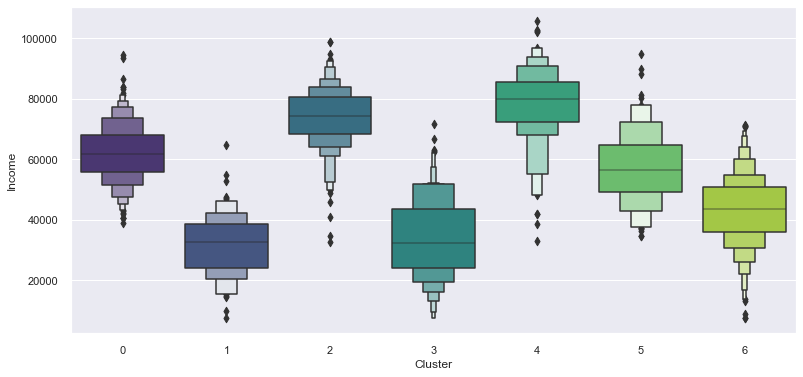

In [48]:
plt.figure(figsize=(13, 6))
sns.boxenplot(x="Cluster", y="Income", data=new_data, palette='viridis')

---------
>MntWines

<AxesSubplot:xlabel='MntWines', ylabel='Income'>

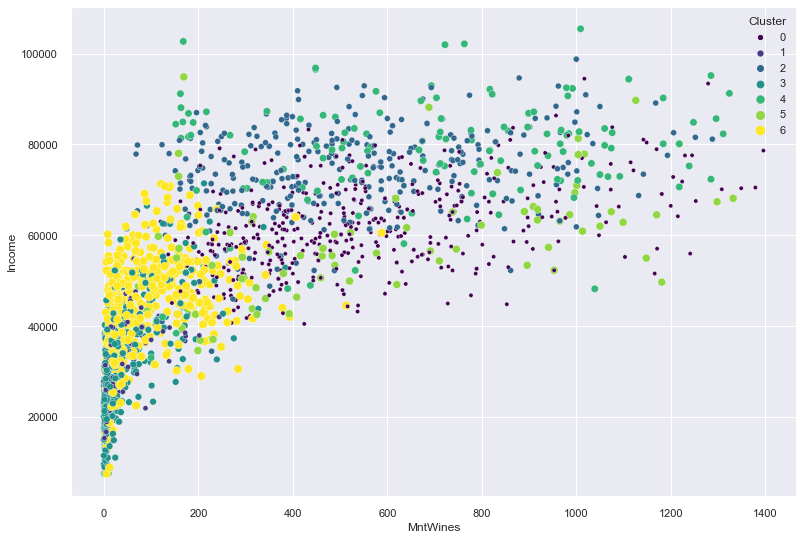

In [56]:
plt.figure(figsize=(13, 9))
sns.scatterplot(x="MntWines",y="Income", hue="Cluster", data=new_data, palette="viridis", size='Cluster')

----------
>MntFishProducts

<AxesSubplot:xlabel='MntFishProducts', ylabel='Income'>

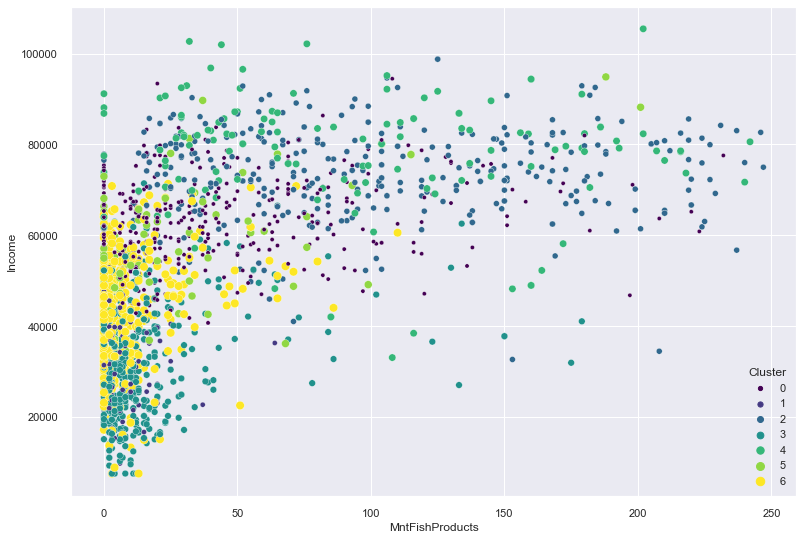

In [54]:
plt.figure(figsize=(13, 9))
sns.scatterplot(x="MntFishProducts",y="Income", hue="Cluster", data=new_data, palette="viridis", size='Cluster')

In [41]:
def trimming_ax(ax, N):
    f_axs = ax.flat
    for ax in f_axs[N:]:
        ax.remove()
    return f_axs[:N]

def cluster_bar_plot(data, product_list, cols=3, figsize=(10, 5)):
    product_list.append('')
    length = len(product_list)
    product_list.remove('')
    if length % 2 == 0:
        rows = length // cols
    else:
        rows = length // cols + 1
    ax = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
    ax = trimming_ax(ax, length)
    for i, product in enumerate(product_list):
        cluster = data.query("Cluster == {}".format(i))
        sns.barplot(x="Cluster", y=product, data=new_data, ax=ax[i])
        ax[i].legend(labels=['{}'.format(product)], title='Product', loc=2, bbox_to_anchor=(1,1))
        
        sns.boxenplot(x="Cluster", y="Income", data=new_data, palette='viridis', ax=ax[-1])
        ax[-1].legend(labels=['Cluster'], title='Cluster_Number', loc=2, bbox_to_anchor=(1,1))

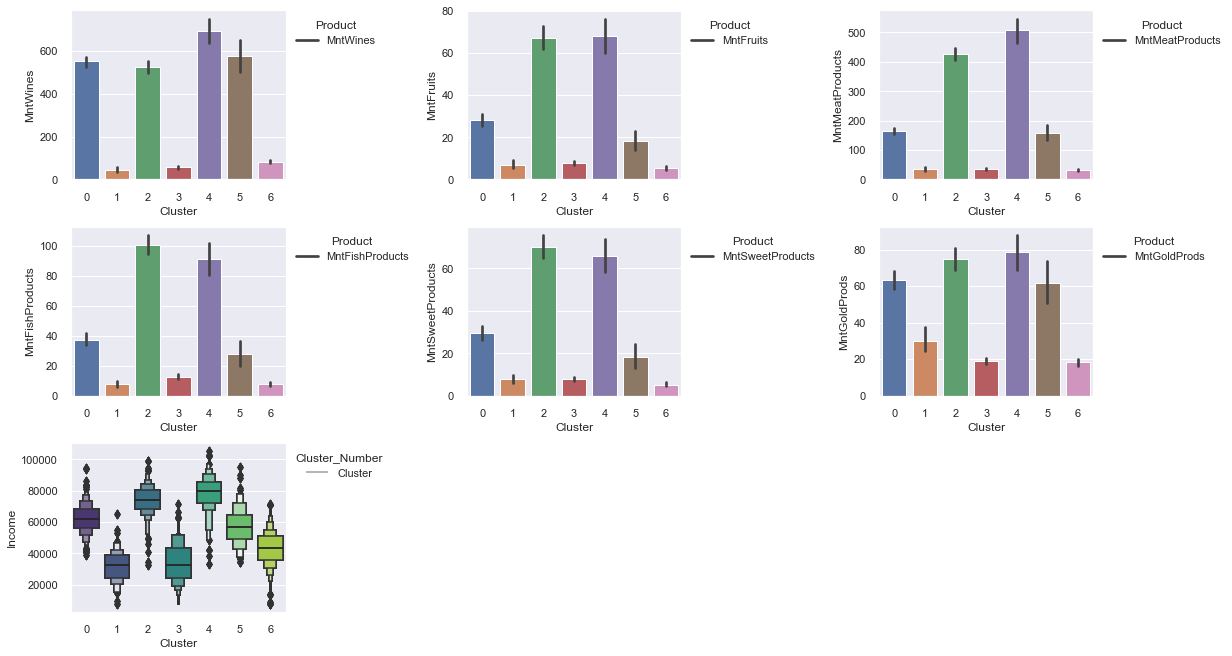

In [57]:
product_List = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts','MntGoldProds']


cluster_bar_plot(new_data, product_List, figsize=(17, 9))

>To stimulate purchases from the Web, it is effective to implement measures for clusters {_}.

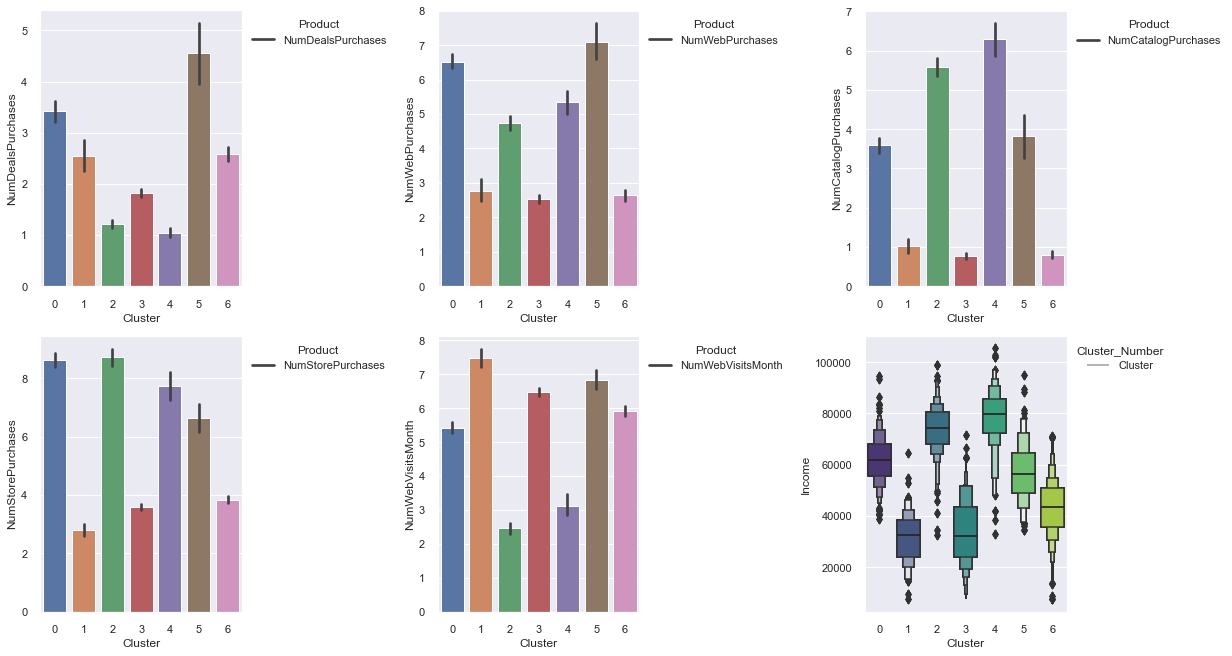

In [58]:
other_list = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

cluster_bar_plot(new_data, other_list, figsize=(17, 9))

<AxesSubplot:xlabel='Age', ylabel='Count'>

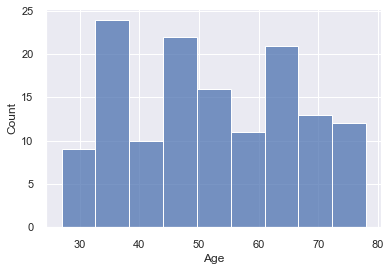

In [44]:
cluster_6 = new_data.query("Cluster == 4")
sns.histplot(x='Age', data=cluster_6.reset_index())

In [45]:
def cluster_hist_plot(data, cols=3, figsize=(10, 5)):
    #cols = cols
    rows = len(np.unique(data['Cluster'])) // cols + 1
    bins = np.round(np.log(len(data)) + 1).astype(int) # Sturgess Formula : k=log2N+1
    ax = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
    ax = trimming_ax(ax, len(np.unique(data['Cluster'])))
    for i in np.unique(data['Cluster']):
        cluster = data.query("Cluster == {}".format(i))
        sns.histplot(x='Age', data=cluster.reset_index(), bins=bins, ax=ax[i])
        #sns.countplot(x='Age', data=cluster.reset_index(), ax=ax[i])
        ax[i].legend(labels=['{}'.format(i)], title='ClusterNumber', loc=2, bbox_to_anchor=(1,1))

>Age range for each cluster

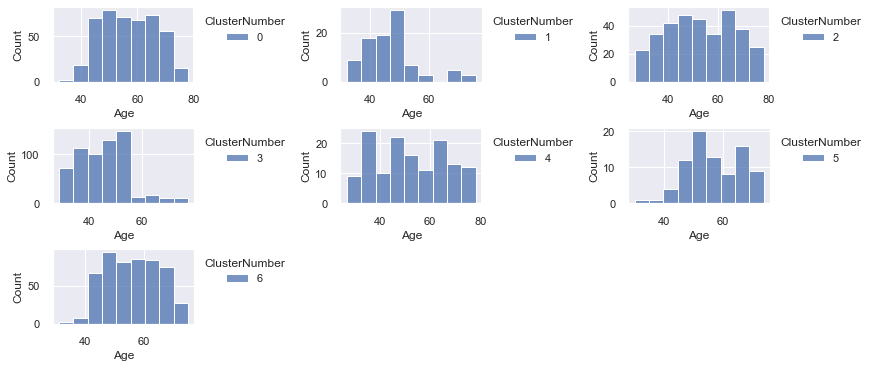

In [46]:
cluster_hist_plot(new_data, figsize=(12, 5))

<a id="section_5"></a>
<div style="font-weight: bold; font-size: 40px">5 : Regression and Classification</div>


<a id="sub_51"></a>
><div style="font-weight: bold; font-size: 20px">5.1 Regression models using clusters, automatic classification models for new data</div>
>....work in process

<div style="font-weight: bold; font-size: 60px">Thank you so much for reading!</div>